**House Price Prediction**

Dima Daouk, Ziad Moghabghab, Rafic Srouji, Lara Zbibo

# 1- Importing Libraries and Dataset

In [1]:
import pandas as pd
pd.set_option('display.notebook_repr_html', True)
pd.set_option('max_columns', 82)
pd.options.display.max_rows = 100
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn_pandas import DataFrameMapper
from sklearn.compose import make_column_transformer,ColumnTransformer
from pandas.api.types import CategoricalDtype
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from numpy import percentile
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MSBA 315- Final Project/house_prices.csv')

# 2- Exploratory Data Analysis

## Visualizing the Target Variable: SalePrice

### Before Transformation


 mu = 180921.20 and sigma = 79415.29


 ----------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 0.98, 'Distribution of the Target Variable SalePrice Before Applying a Transformation')

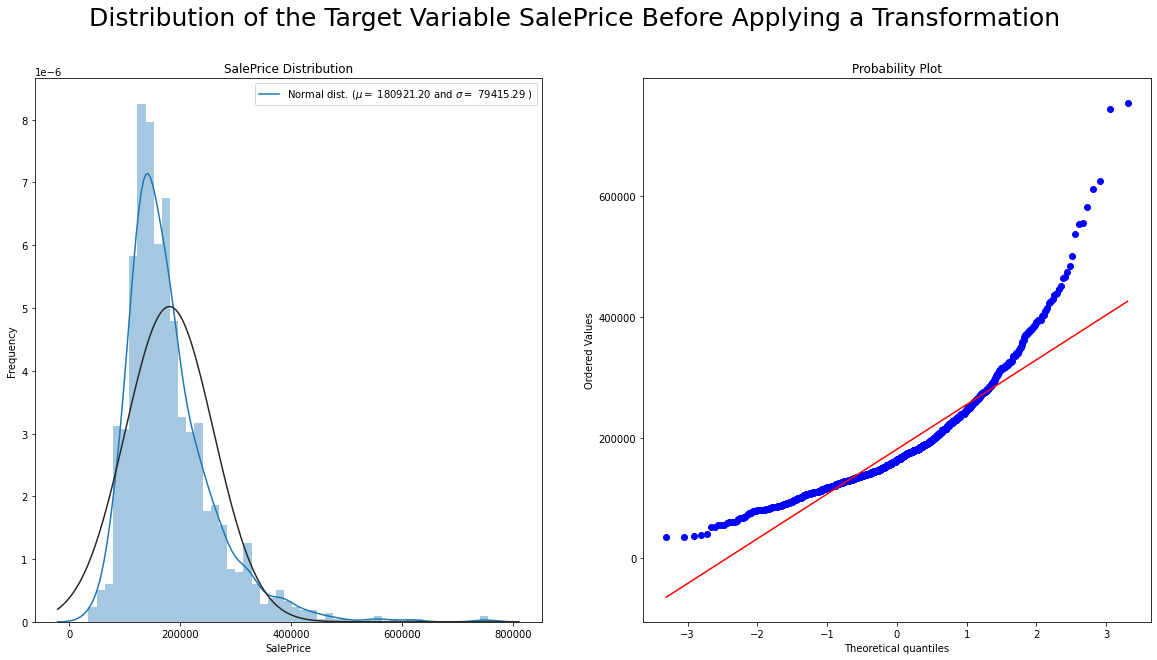

In [4]:
y = df['SalePrice']
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print('\n', '-' * 136)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
res = stats.probplot(df['SalePrice'], plot=plt)
plt.suptitle('Distribution of the Target Variable SalePrice Before Applying a Transformation', fontsize = 25)

Normalcy:
- We are interested in exploring if the target variable is normally distributed because when we have normally distributed data we are able to predict unseen data using models that rely on the data being normally distributed. Therefore, we plot the histogram and the curve of the distribution to explore the distribution of house sales prices.

Explanation:

- We notice that the **distribution is skewed to the right** and is **not normally distributed**.

- The blue line (on the graph to the left) helps to understand the distribution of the data. When we compare it with the black one, which represents the theoretical normal distribution, we notice that the two lines are not similar to one another. Therefore, we can deduce that the data is not normally distributed. 

- The plot on the right (QQ plot) re-affirms our findings in the previous plot since the blue points do not fit well the line.

### After Transformation


 mu = 12.02 and sigma = 0.40


 ----------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 0.98, 'Distribution of the Target Variable SalePrice After Applying a Log Transformation')

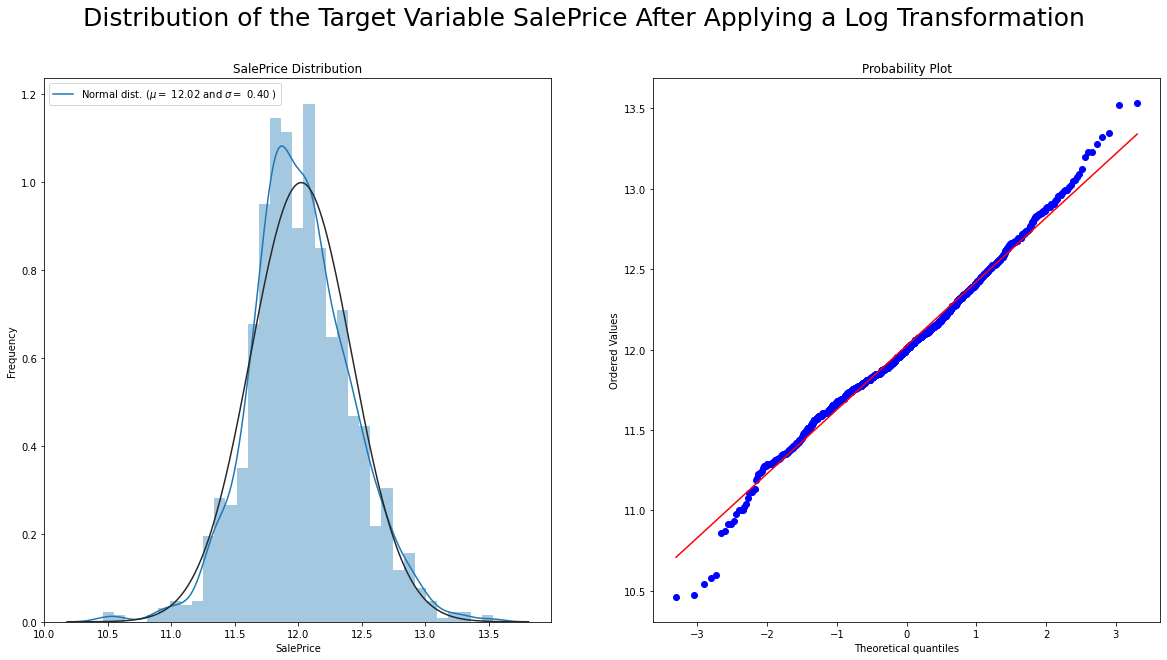

In [5]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df1 = df.copy()
df1["SalePrice"] = np.log1p(df1["SalePrice"])
y_train = df["SalePrice"]

#Check the new distribution 
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df1['SalePrice'] , fit=norm, label = "Skewness : %.2f"%(df1['SalePrice'].skew()));


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
print('\n', '-' * 136)
plt.subplot(1,2,2)
res = stats.probplot(df1['SalePrice'], plot=plt)
plt.suptitle('Distribution of the Target Variable SalePrice After Applying a Log Transformation', fontsize = 25)

Due to the SalePrice not being normally distributed, we applied a **log transformation** (log1p) to the data in order for it to become more normally distributed. 

By assessing the two figures above, we can visually deduce that applying a log transformation made the target variable SalePrice resemble a normal distribution.

## Visualizing Numerical Features

### Heatmap of all Features

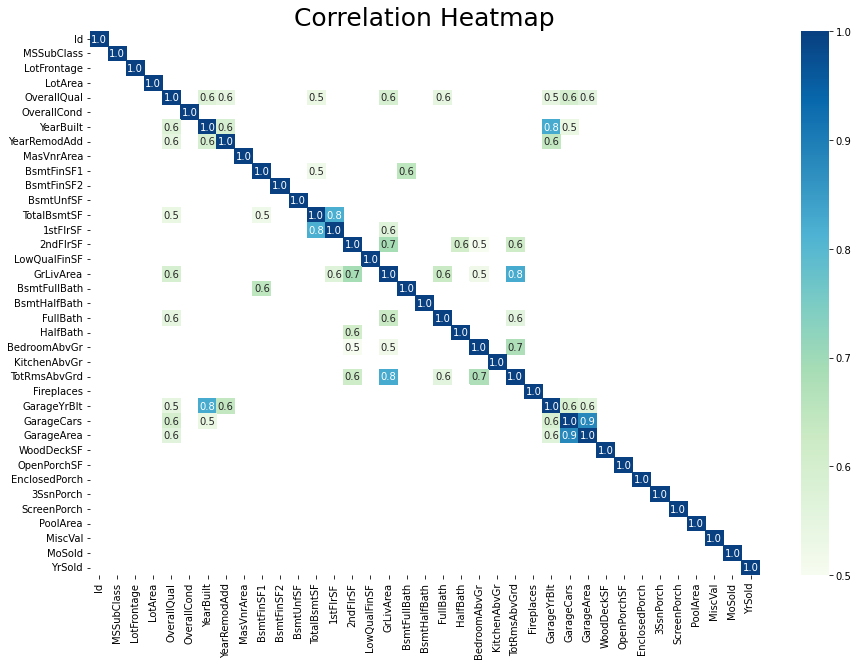

In [6]:
#Create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap', fontsize = 25)

### Heatmap of Numerical Features to be Dropped

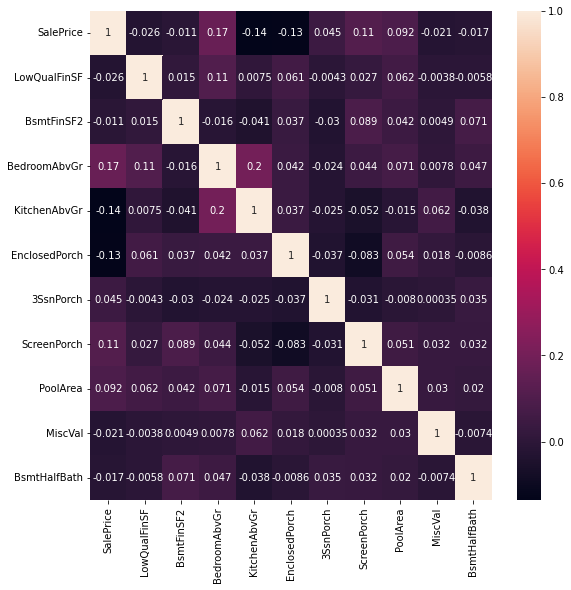

In [7]:
heatmap = plt.figure(figsize=(9, 9))

corrMatrix = df[['SalePrice', 'LowQualFinSF', 'BsmtFinSF2', 'BedroomAbvGr', 'KitchenAbvGr', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
           'BsmtHalfBath']].corr()

heatmap = sns.heatmap(corrMatrix, annot=True)
plt.show()

Conclusion: Dropping Unnecessary Columns

The following columns have a very low correlation (in absolute value) to the target variable SalePrice: LowQualFinSF, BsmtFinSF2, BedroomAbvGr, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal


Thus, we will drop them.

### Visualizing GarageCars and GarageArea

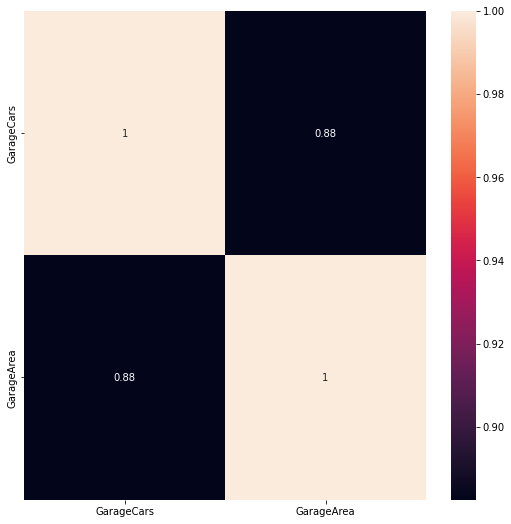

In [8]:
# Comparing GarageCars and GarageArea
heatmap = plt.figure(figsize=(9, 9))

corrMatrix = df[['GarageCars', 'GarageArea']].corr()

heatmap = sns.heatmap(corrMatrix, annot=True)
plt.show()

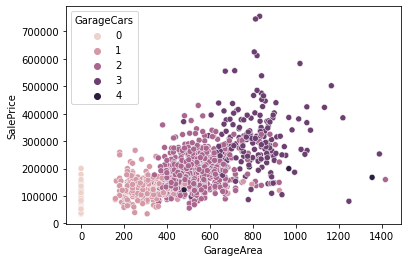

In [9]:
# GarageArea
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", hue = "GarageCars")

We observe that **the two features garage cars and garage areas have a high correlation of 0.88**, therefore one of those features should be removed as they provide very similar information. 

Upon further expecting the scatter plot of the relationship between SalePrice and GarageArea with a hue to account for GarageCars, we deduce that GarageArea provides better information than GarageCars, thus we will be **dropping GarageCars later in the feature engineering portion of the code before constructing our models**.

### Exploring PoolArea

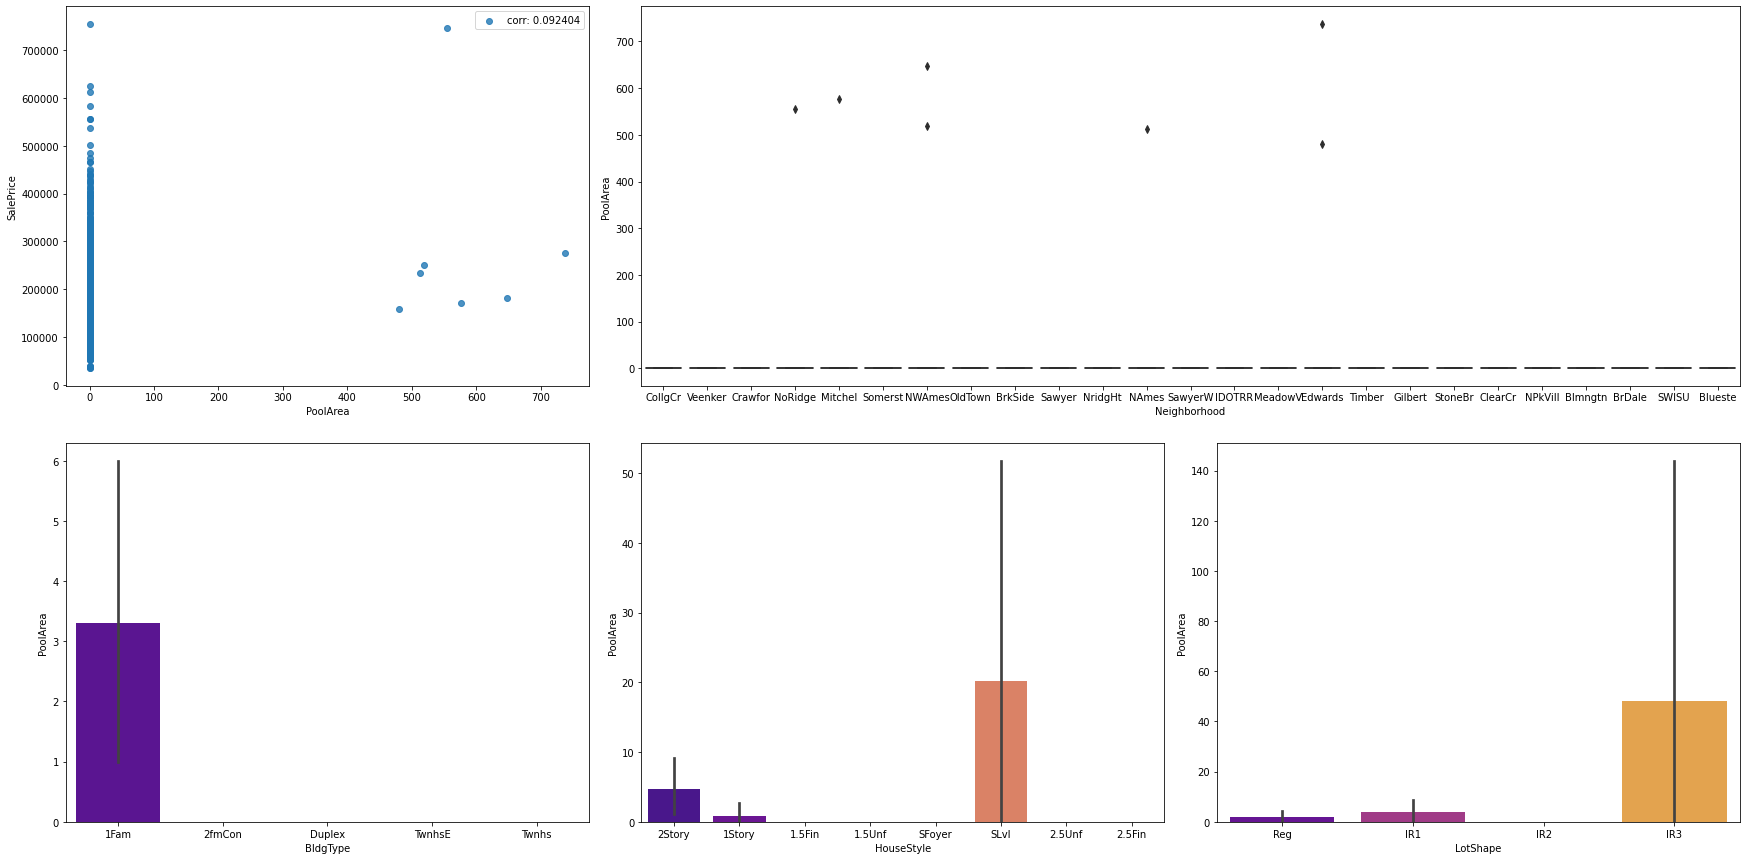

In [10]:
# PoolArea: pool area in square feet

grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=df['PoolArea'], y=df['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(df['PoolArea'], df['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="PoolArea", data=df, palette = "plasma")

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="PoolArea", data=df, palette = "plasma")

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="PoolArea", data=df, palette = "plasma")

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="PoolArea", data=df, palette = "plasma");

Note: we found it a bit strange that the PoolArea had very low correlation with SalePrice, therefore we decided to explore this a bit further through visualizing the following plots.

After looking at the visualizations above, we confirm that we must drop this feature.

## Visualizing Categorical Features

### Features that Need Dropping

#### LandSlope

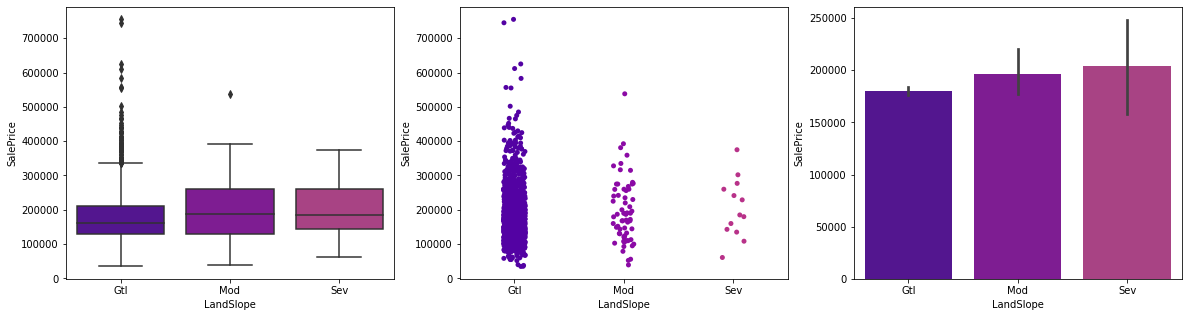

In [11]:
# LandSlope: represents the slope of property

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandSlope", y="SalePrice", data=df, palette = sns.color_palette("plasma"))

plt.subplot(1, 3, 2)
sns.stripplot(x="LandSlope", y="SalePrice", data=df, size = 5, jitter = True, palette = sns.color_palette("plasma"));

plt.subplot(1, 3, 3)
sns.barplot(x="LandSlope", y="SalePrice", data=df, palette = sns.color_palette("plasma"));

#### BsmtFinType2

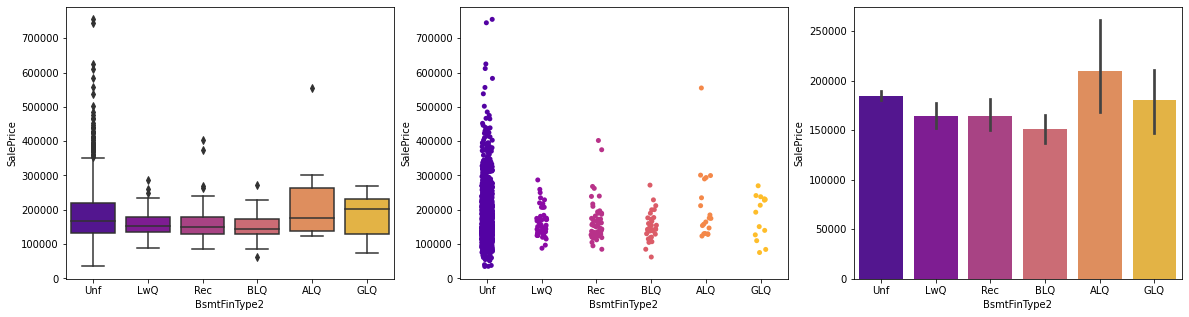

In [12]:
# BsmtFinType2: Rating of basement finished area (if multiple types)

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=df, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = "plasma");

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=df, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = "plasma");

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=df, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = "plasma");

### Features that Will Not be Dropped

#### HouseStyle

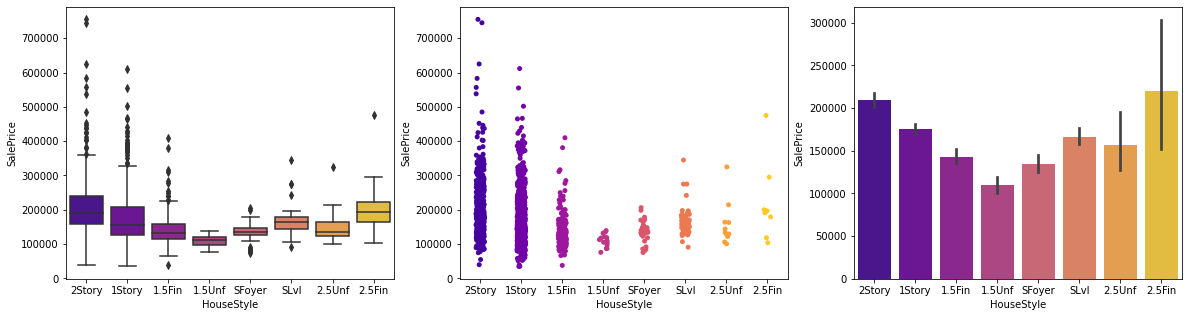

In [13]:
# HouseStyle: represents the type of dwelling (ie.  type of living quarters)

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=df, palette = "plasma");

plt.subplot(1, 3, 2)
sns.stripplot(x="HouseStyle", y="SalePrice", data=df, size = 5, jitter = True, palette = "plasma");

plt.subplot(1, 3, 3)
sns.barplot(x="HouseStyle", y="SalePrice", data=df, palette = "plasma");

#### OverallQual

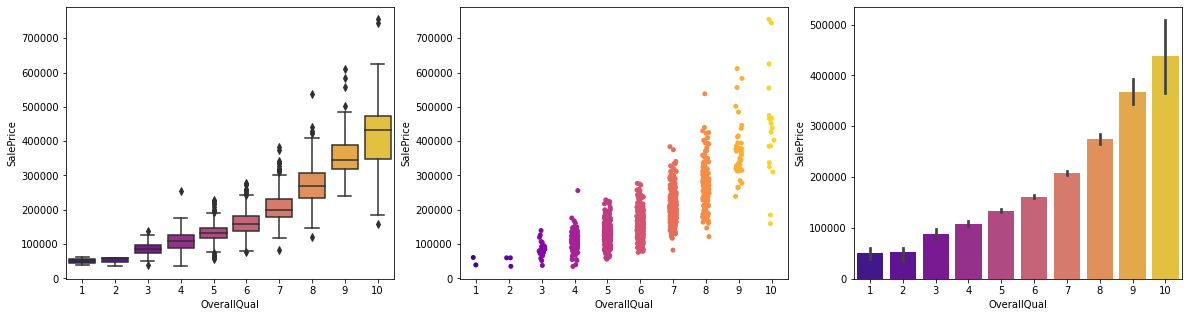

In [14]:
# OverallQual: is a rating of the overall material and finish of the house

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=df, palette = "plasma");

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=df, size = 5, jitter = True, palette = "plasma");

plt.subplot(1, 3, 3)
sns.barplot(x="OverallQual", y="SalePrice", data=df, palette = "plasma");

#### Neighborhood

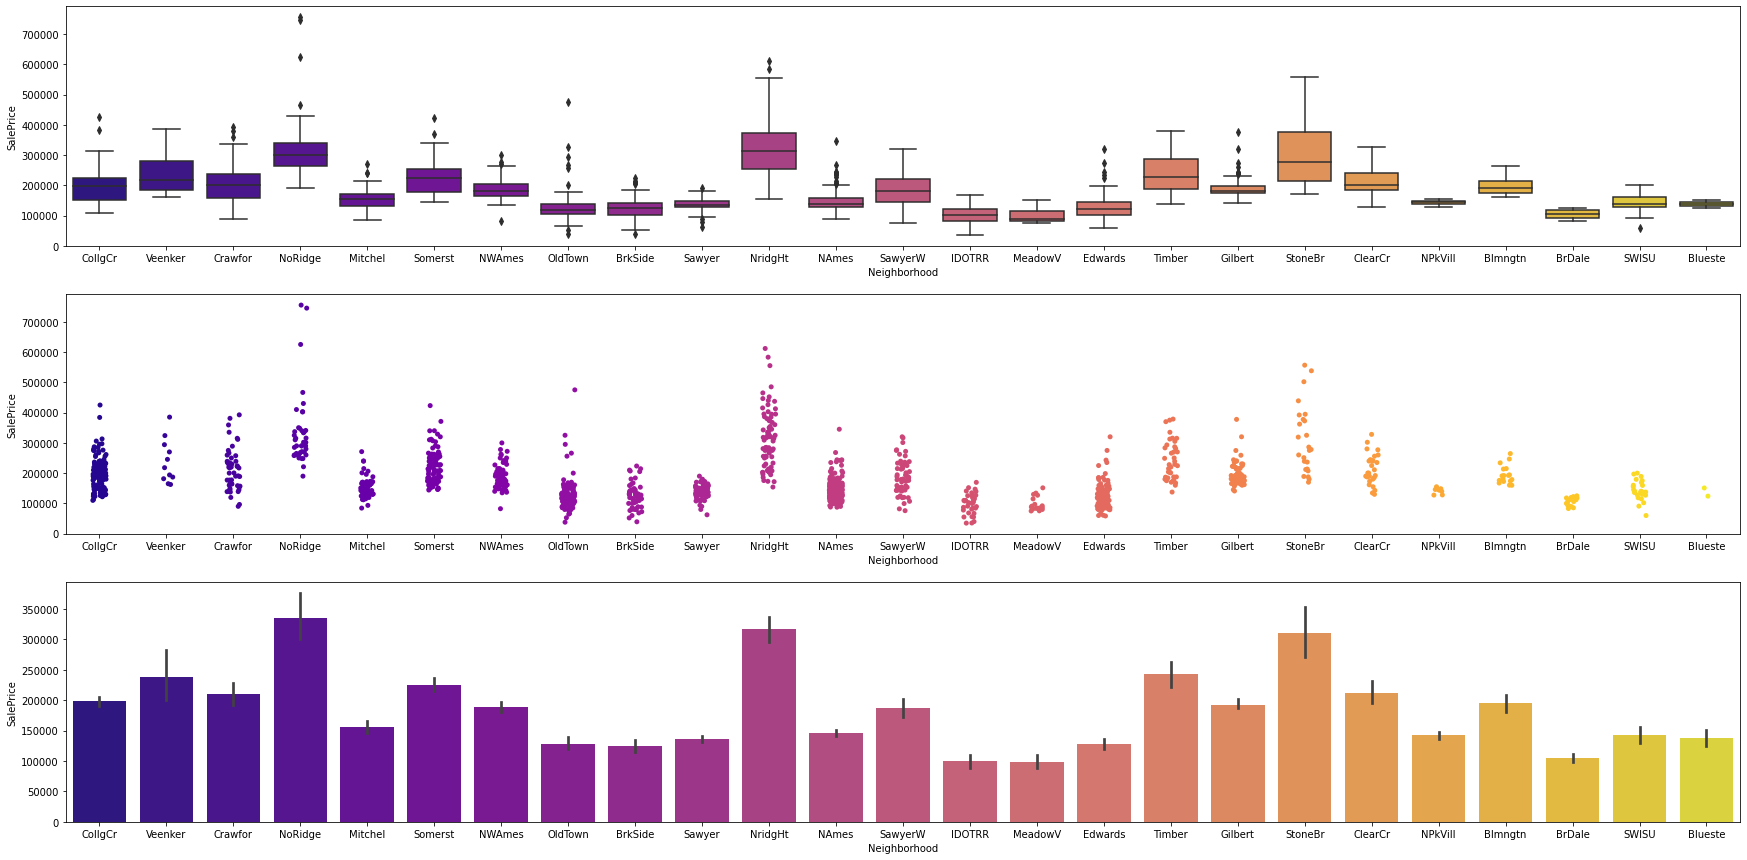

In [15]:
# Neighborhood: represents the physical locations within the Ames city limits

plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, palette = "plasma")

plt.subplot(3, 1, 2)
sns.stripplot(x="Neighborhood", y="SalePrice", data=df, size = 5, jitter = True, palette = "plasma");

plt.subplot(3, 1, 3)
sns.barplot(x="Neighborhood", y="SalePrice", data=df, palette = "plasma");

### Features that Underwent Feature Engineering

#### BsmtExposure

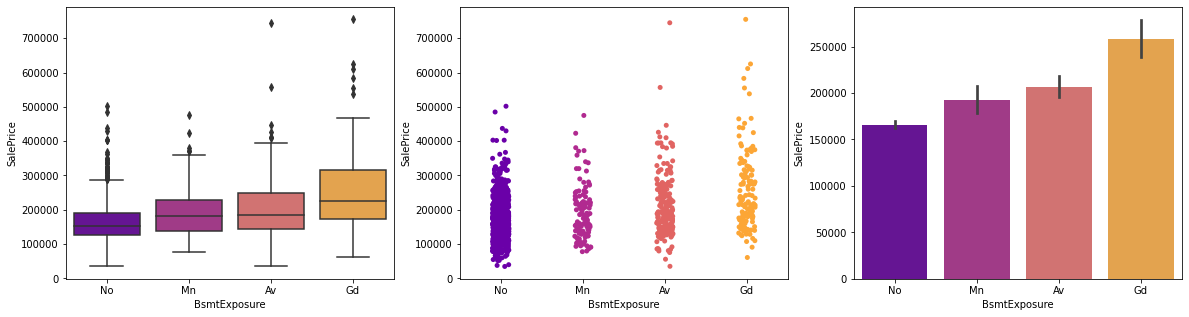

In [16]:
# BsmtExposure: Refers to walkout or garden level walls

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=df, order=['No', 'Mn', 'Av', 'Gd'], palette = "plasma");

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtExposure", y="SalePrice", data=df, size = 5, jitter = True, order=['No', 'Mn', 'Av', 'Gd'], palette = "plasma");

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtExposure", y="SalePrice", data=df, order=['No', 'Mn', 'Av', 'Gd'], palette = "plasma");

In [17]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

We conducted feature engineering on this feature whereby we joined the 2 categories 'No' and 'Mn' into 1 'Bad'

**Original dataset**

No:    No Exposure

Mn:    Mimimum Exposure

Av:    Average Exposure 

Gd:    Good Exposure




**After feature engineering** (done later)

Bad

Average

Good

#### TotalFloorsArea

Visualizing a created feature done by feature engineering

This feature represents the total house area in square feet by c**ombining the following 3 features into 1**: 1stFlrSF, 2ndFlrSF, TotalBsmtSF.




In [18]:
# TotalFloorsArea
df_new = df.copy()

df_new['2ndFlr'] = df_new['2ndFlrSF'].apply(lambda x: 'Yes' if x>0 else 'No')
df_new['Basement'] = df_new['TotalBsmtSF'].apply(lambda x: 'Yes' if x>0 else 'No')
df_new['TotalFloorsArea'] = df_new['1stFlrSF'] + df_new['2ndFlrSF'] + df_new['TotalBsmtSF']
df_new.drop(columns=['1stFlrSF','2ndFlrSF', 'TotalBsmtSF'], inplace=True)

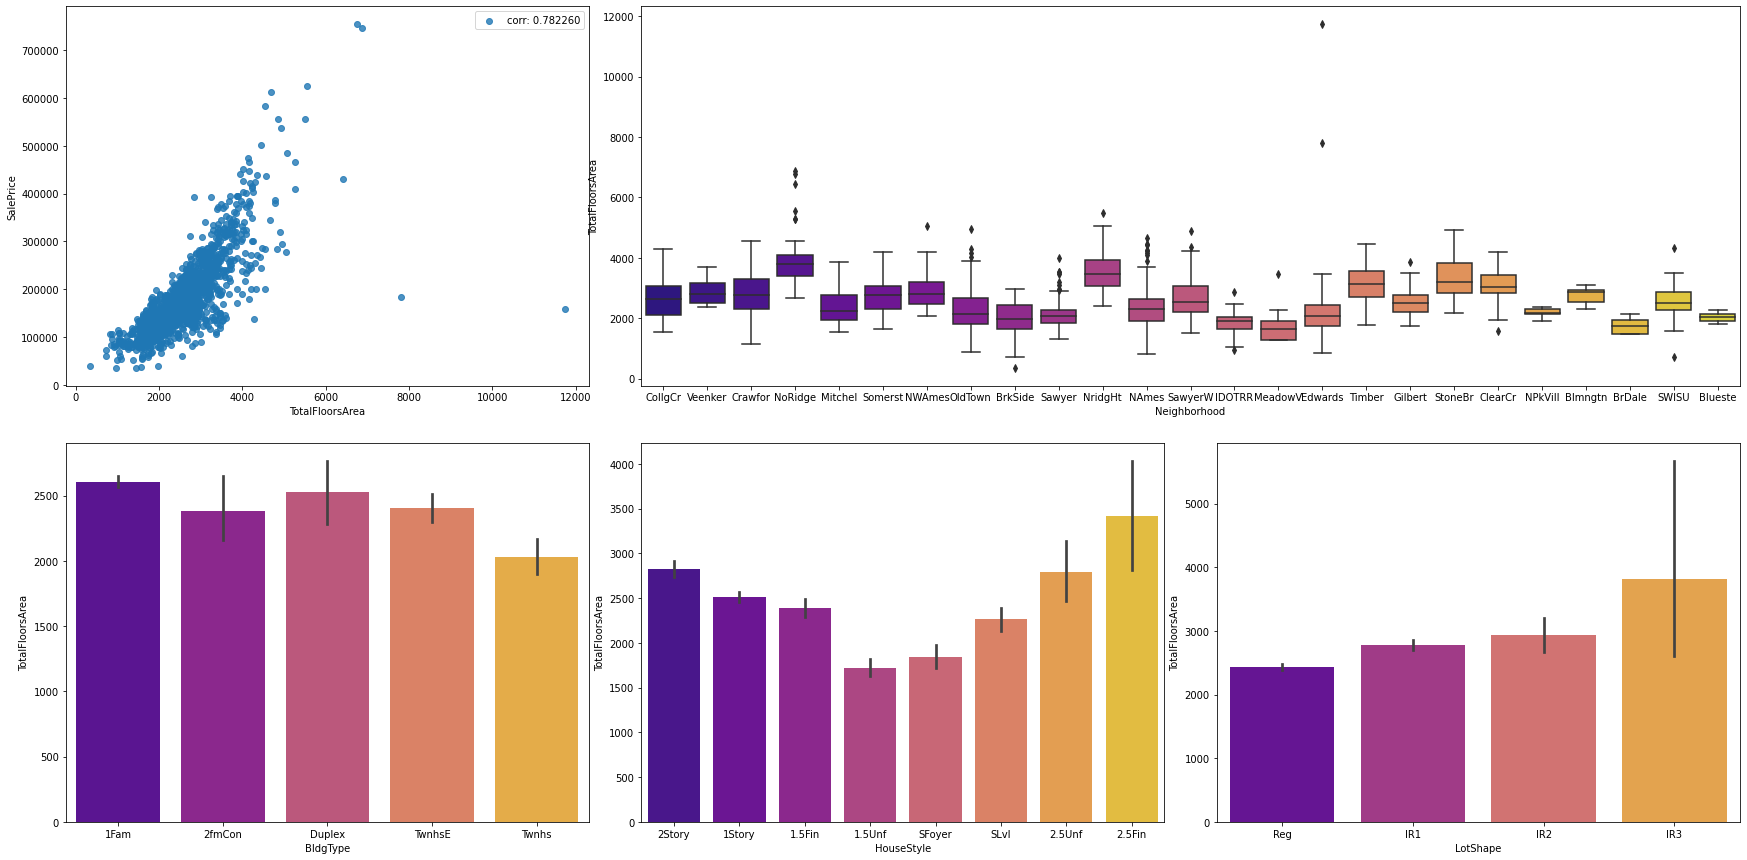

In [19]:
# TotalFloorsArea: the total house area
# These visualizations validate the creation of the new feature TotalFloorsArea

grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=df_new['TotalFloorsArea'], y=df_new['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(df_new['TotalFloorsArea'], df_new['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalFloorsArea", data=df_new, palette = "plasma")

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalFloorsArea", data=df_new, palette = "plasma")

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalFloorsArea", data=df_new, palette = "plasma")

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalFloorsArea", data=df_new, palette = "plasma");

## Visualizing Missing Values

The final part of the exploratory data analysis consists of understanding from which features do the missing values come from. Missing values will be dealt with in the pipeline (following section).

In [20]:
all = df.copy()
all.drop(['SalePrice'], axis=1, inplace=True)
print("The full data size is : {}".format(all.shape))

The full data size is : (1460, 80)


Text(0.5, 1.0, 'Percent of Missing Data By Feature')

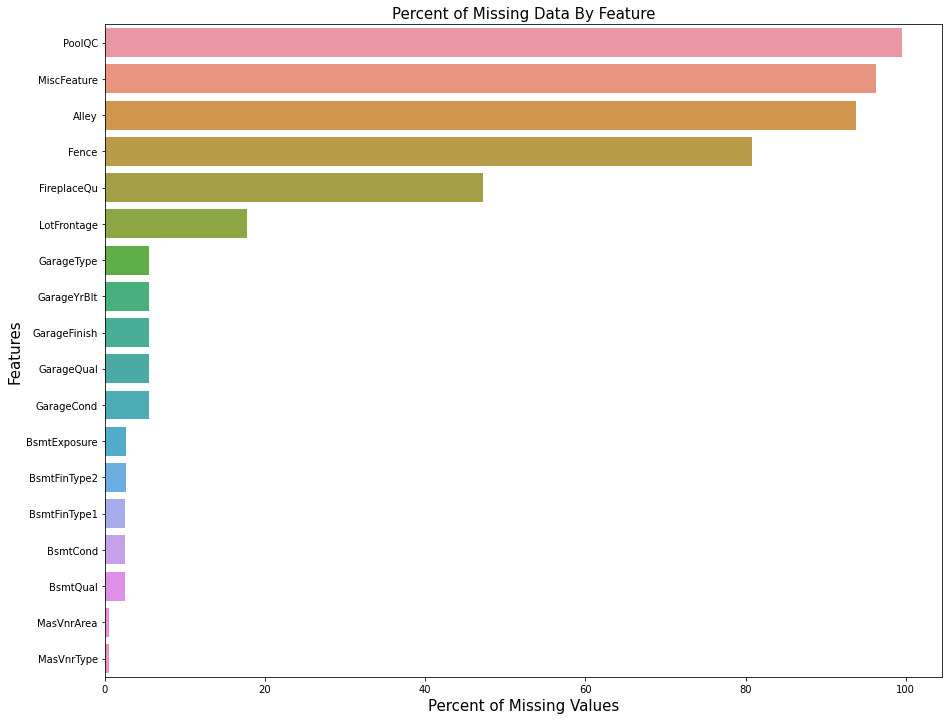

In [21]:
# Visualizing missing data
all_na = (all.isnull().sum() / len(all)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:18]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks()
sns.barplot(x=all_na, y=all_na.index, orient="h")
plt.xlabel('Percent of Missing Values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Percent of Missing Data By Feature', fontsize=15)

In [22]:
# Explored the features with missing data individually
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945


# 3- Data Preprocessing

In [23]:
# Dropping features based on a detailed exploratory data analysis we have conducted 
# in a separate notebook whereby we visualized and assessed each feature

features_before_dropping = df.shape[1]

to_drop = ['LowQualFinSF', 'BsmtFinSF2', 'BedroomAbvGr', 'KitchenAbvGr', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
           'BsmtHalfBath', 'MasVnrArea', 'BsmtFinSF1', 'GarageCars', 'WoodDeckSF', 
           'OpenPorchSF', 'Utilities', 'LotConfig', 'LandSlope', 'OverallCond', 
           'Functional', 'RoofMatl', 'Exterior2nd', 'MSSubClass', 'Street', 
           'Condition1', 'Condition2', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
           'Heating', 'HeatingQC', 'GarageQual', 'GarageCond', 'PavedDrive', 
           'BsmtFinType1', 'BsmtFinType2','PoolQC', 'MiscFeature', 'SaleType', 
           'GarageYrBlt', 'MoSold', 'YrSold','Id', 'BsmtFullBath', 'BsmtUnfSF']
df.drop(columns = to_drop, inplace = True, axis = 1) 

features_after_dropping = df.shape[1]

features_dropped = features_before_dropping - features_after_dropping
print("Number of features dropped: ", features_dropped)

Number of features dropped:  43


## Ordinal Variables/ Decreasing Number of Categories

In [24]:
# Encoding the following features: 'ExterCond', 'ExterQual', 'FireplaceQu', 'KitchenQual','BsmtQual'

ord_groups = {'Fa': 'Bad', 'Po': 'Bad', 'TA': 'Average', 'Gd': 'Good', 'Ex':'Good'}
columns_ord = ['ExterCond', 'ExterQual', 'FireplaceQu', 'KitchenQual','BsmtQual']
cat_type = CategoricalDtype(categories=['Bad','Average','Good'], ordered=True)
for col in columns_ord:
    df[col].replace(ord_groups, inplace=True)
    
    df[col] = df[col].astype(cat_type)

### BsmtExposure

In [25]:
# BsmtExposure categories before  
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [26]:
# Reducing the number of categories found in BsmtExposure feature (based on EDA)
bsmt_exposure = {'No': 'Bad', 'Mn': 'Bad', 'Av': 'Average', 'Gd': 'Good', 'Ex':'Good'}
df['BsmtExposure'].replace(bsmt_exposure,inplace = True)
df['BsmtExposure'] = df['BsmtExposure'].astype(cat_type)

In [27]:
# BsmtExposure categories after  
df['BsmtExposure'].value_counts()

Bad        1067
Average     221
Good        134
Name: BsmtExposure, dtype: int64

### LotShape

In [28]:
# LotShape categories before 
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [29]:
# Reducing the number of categories found in LotShape feature from 4 to 2 (based on EDA)
lotshape = {'Reg': 'Reg', 'IR1':'IR', 'IR2':'IR', 'IR3':'IR'}
df=df.replace({'LotShape': lotshape})

In [30]:
# LotShape categories after 
df['LotShape'].value_counts()

Reg    925
IR     535
Name: LotShape, dtype: int64

### LandContour

In [31]:
# LandContour categories before 
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [32]:
# Reducing the number of categories found in LandContour feature 4 to 3 (based on EDA)
landcontour = {'Lvl': 'Lvl', 'Bnk':'Bnk', 'HLS':'Other', 'Low':'Other'}
df=df.replace({'LandContour': landcontour})

In [33]:
# LandContour categories after 
df['LandContour'].value_counts()

Lvl      1311
Other      86
Bnk        63
Name: LandContour, dtype: int64

### RoofStyle

In [34]:
# RoofStyle categories before 
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [35]:
# Reducing the number of categories found in RoofStyle feature from 6 to 2 (based on EDA)
roofstyle = {'Gable': 'Gable', 'Hip':'Other', 'Flat':'Other', 'Gambrel':'Other', 'Mansard':'Other', 'Shed':'Other'}
df=df.replace({'RoofStyle': roofstyle})

In [36]:
# RoofStyle categories after 
df['RoofStyle'].value_counts()

Gable    1141
Other     319
Name: RoofStyle, dtype: int64

### Exterior1st

In [37]:
# Exterior1st categories before 
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [38]:
# Reducing the number of categories found in Exterior1st feature from 15 to 5 (based on EDA)
exterior1st = {'VinylSd': 'VinylSd,CemntBd,Stone,ImStucc', 'HdBoard':'MetalSd,WdSdng,HdBoard,Stucco,WdShing', 'MetalSd':'MetalSd,WdSdng,HdBoard,Stucco,WdShing', 'Wd Sdng':'MetalSd,WdSdng,HdBoard,Stucco,WdShing', 
               'Plywood':'Plywood,BrkFace', 'CemntBd':'VinylSd,CemntBd,Stone,ImStucc',
               'BrkFace': 'Plywood,BrkFace', 'WdShing':'MetalSd,WdSdng,HdBoard,Stucco,WdShing', 'Stucco':'MetalSd,WdSdng,HdBoard,Stucco,WdShing', 'AsbShng':'AsbShng,AsphShn,CBlock,BrkComm', 'BrkComm':'AsbShng,AsphShn,CBlock,BrkComm', 
               'Stone':'VinylSd,CemntBd,Stone,ImStucc',
               'AsphShn': 'AsbShng,AsphShn,CBlock,BrkComm', 'ImStucc':'VinylSd,CemntBd,Stone,ImStucc', 'CBlock':'AsbShng,AsphShn,CBlock,BrkComm'}
df=df.replace({'Exterior1st': exterior1st})

In [39]:
# Exterior1st categories after 
df['Exterior1st'].value_counts()

MetalSd,WdSdng,HdBoard,Stucco,WdShing    699
VinylSd,CemntBd,Stone,ImStucc            579
Plywood,BrkFace                          158
AsbShng,AsphShn,CBlock,BrkComm            24
Name: Exterior1st, dtype: int64

### Alley

In [40]:
# Alley categories before 
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [41]:
# Changing the categories found in Alley feature to Yes or No
alley = {'None': 'No', 'Grvl':'Yes', 'Pave':'Yes'}
df=df.replace({'Alley': alley})

In [42]:
# Alley categories after 
df['Alley'].value_counts()

Yes    91
Name: Alley, dtype: int64

### Electrical

In [43]:
# Electrical categories before 
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
# Reducing the number of categories found in Electrical feature from 6 to 2 (based on EDA)
electrical = {'SBrkr': 'SBrkr', 'FuseA':'Other', 'FuseF':'Other', 'FuseP':'Other', 'Mix':'Other', 'None':'Other'}
df=df.replace({'Electrical': electrical})

In [45]:
# Electrical categories after 
df['Electrical'].value_counts()

SBrkr    1334
Other     125
Name: Electrical, dtype: int64

### GarageType

In [46]:
# GarageType categories before 
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [47]:
# Reducing the number of categories found in GarageType feature from 6 to 5 (based on EDA)
garage = {'Attchd': 'Attchd', 'Detchd':'Detchd', 'BuiltIn':'BuiltIn', 'None':'NoGarage', 
          'Basment':'Basment,2Types', 'CarPort':'CarPort', '2Types':'Basment,2Types'}
df=df.replace({'GarageType': garage})

In [48]:
# GarageType categories after 
df['GarageType'].value_counts()

Attchd            870
Detchd            387
BuiltIn            88
Basment,2Types     25
CarPort             9
Name: GarageType, dtype: int64

### Fence

In [49]:
# Fence categories before 
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [50]:
# Encoding (binary- 2 categories)
fence = {'None': 'No', 'MnPrv':'Yes', 'GdPrv':'Yes', 'GdWo':'Yes', 'MnWw':'Yes'}
df=df.replace({'Fence': fence})

In [51]:
# Fence categories after 
df['Fence'].value_counts()

Yes    281
Name: Fence, dtype: int64

### SaleCondition

In [52]:
# SaleCondition categories before 
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [53]:
# Reducing the number of categories found in SaleCondition feature from 6 to 2 (based on EDA)
salecondition = {'Normal': 'Normal', 'Partial':'Special', 'Abnorml':'Special', 'Family':'Special', 'Alloca':'Special', 'AdjLand':'Special'}
df=df.replace({'SaleCondition': salecondition})

In [54]:
# SaleCondition categories after 
df['SaleCondition'].value_counts()

Normal     1198
Special     262
Name: SaleCondition, dtype: int64

### Fireplaces

In [55]:
# Fireplaces categories before 
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [56]:
# Applying a lambda function to change from number of fireplaces to Yes or No categories
df['Fireplaces'] = df['Fireplaces'].apply(lambda x: 'Yes' if x >0 else 'No')

In [57]:
# Fireplaces categories after
df['Fireplaces'].value_counts()

Yes    770
No     690
Name: Fireplaces, dtype: int64

### Assessing Correlation After Feature Engineering (Ordinal Encoding)

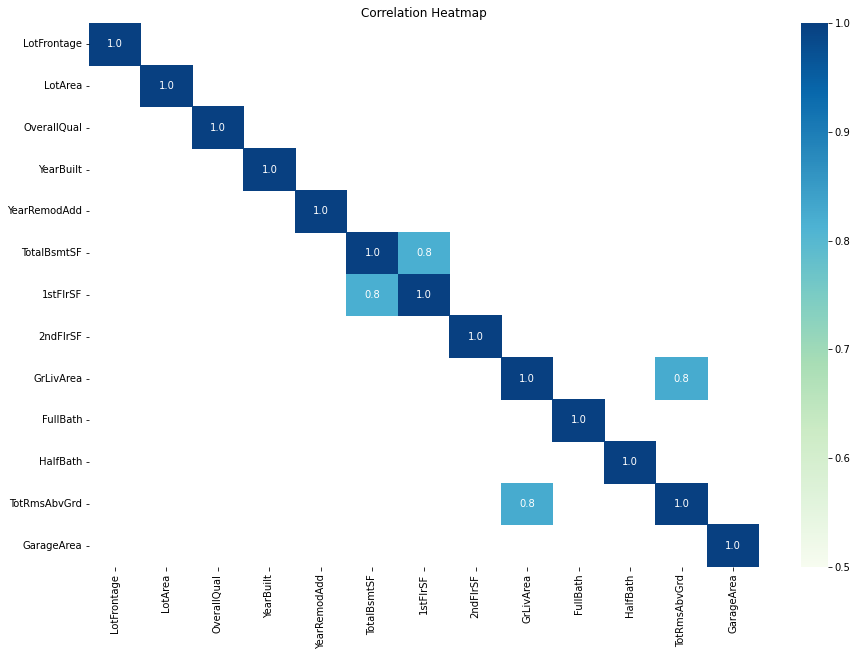

In [58]:
#Create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.7]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

In [59]:
# Dropping GrLivArea
df.drop(columns='GrLivArea', inplace=True)

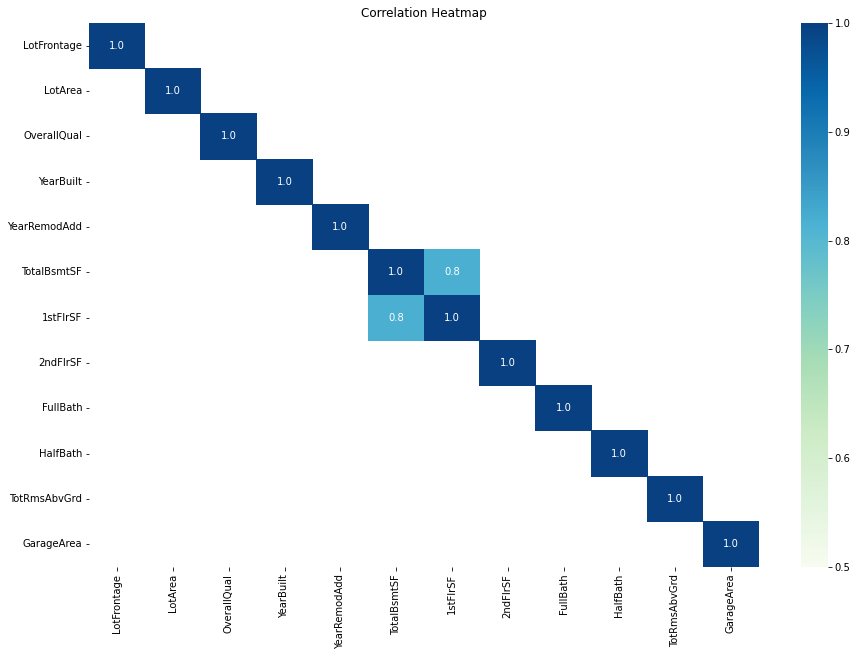

In [60]:
#Create correlation matrix from train data excluding `SalePrice`
corr_mat = df.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.7]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')
plt.show()

#4- Feature Engineering

### YearBuilt

In [ ]:
# YearBuilt categories before 
df['YearBuilt'].value_counts()

In [62]:
# Creating a new feature named Age where the age of the house is calculated instead of having the age the house was built
# Note: we use 2011 because the date of the year this dataset contains the information of house prices is 2011.

df['Age'] = 2011 - df['YearBuilt']

In [ ]:
# YearBuilt categories after 
df['Age'].value_counts()

In [64]:
# Dropping YearBuilt
df.drop(columns=['YearBuilt'], inplace=True)

### YearRemodAdd

In [ ]:
# YearRemodAdd categories before 
df['YearRemodAdd'].value_counts()

In [66]:
# Creating the feature RemodAge which calculates the number of years since the house has underwent remodeling 
# instead of having the date the house underwent remodeling

df['RemodAge'] = 2011 - df['YearRemodAdd']

In [ ]:
# YearRemodAdd categories after 
df['RemodAge'].value_counts()

In [68]:
# Dropping YearRemodAdd
df.drop(columns=['YearRemodAdd'], inplace=True)

### Bath

In [ ]:
df['HalfBath'].value_counts()

In [ ]:
df['FullBath'].value_counts()

In [71]:
# Combining the number of bathrooms in total by adding the number of full and half bathrooms
df['Bath'] = df['FullBath'] + df['HalfBath']

In [ ]:
# Values of the categories of the Bath feature after combining FullBath and HalfBath
df['Bath'].value_counts()

In [73]:
# Dropping records where the total number of bathrooms is 0 (not logical, data entry error)
df.drop(df.loc[df['Bath'] == 0].index,inplace=True)

In [74]:
df['Bath'].value_counts()

2    612
1    469
3    353
4     23
Name: Bath, dtype: int64

In [75]:
# Dropping the fields FullBath and HalfBath
df.drop(columns=['FullBath', 'HalfBath'], inplace=True)

### TotalFloorsArea

In [76]:
# Applying a lambda function to the two columns 2ndFlr and Basement to find if there are a second floor/ basement (Yes or No) 
# instead of having the area value of the second floor/ basement

df['2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 'Yes' if x>0 else 'No')
df['Basement'] = df['TotalBsmtSF'].apply(lambda x: 'Yes' if x>0 else 'No')

In [77]:
# Combining the total number of floors
df['TotalFloorsArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

In [78]:
# Dropping 1stFlrSF, 2ndFlrSF, TotalBsmtSF
df.drop(columns=['1stFlrSF','2ndFlrSF', 'TotalBsmtSF'], inplace=True)

# 5- Pipeline Construction

In [79]:
num = df.select_dtypes(include = np.number).columns.tolist()

In [80]:
num.remove('SalePrice')

In [81]:
# Subsetting features

# Subsetting categorical features: ordinal
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 
                    'KitchenQual', 'FireplaceQu', 'BsmtExposure']
df_ordinal = df[ordinal_features]

# Subsetting categorical features: nominal
nominal_features = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'Neighborhood',
                    'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 
                    'Foundation', 'CentralAir', 'Electrical', 'Fireplaces', 
                    'GarageType', 'GarageFinish', 'Fence', 'SaleCondition', '2ndFlr', 'Basement']
df_nominal = df[nominal_features]

# Subsetting numerical features
numerical_features = num
df_numerical = df[numerical_features]

In [82]:
# Features
X = pd.concat([df_numerical, df_ordinal, df_nominal], axis = 1)

# Taregt Variable
y = df['SalePrice']

y_log=np.log(y)

In [83]:
# Categorical pipeline
cat_pipeline= Pipeline(steps=[
    ('impute', SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'None')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

ordinal_pipeline= Pipeline(steps=[
    ('ord1', OrdinalEncoder(categories = [['Bad','Average','Good']], handle_unknown='use_encoded_value',
                           unknown_value=-1))
])

# Numerical pipeline     
num_pipeline = Pipeline(steps=[
   
    ('impute', KNNImputer(missing_values = np.nan)),
    ('log', FunctionTransformer(np.log1p)),
      ('outlier',RobustScaler())
])

# Pipeline
column_transformer= ColumnTransformer(transformers=[
    ('ohe', cat_pipeline, nominal_features),                                                   
    ('ord1', ordinal_pipeline, ['ExterQual']),
    ('ord2', ordinal_pipeline, ['ExterCond']),
    ('ord3', ordinal_pipeline, ['BsmtQual']),
    ('ord4', ordinal_pipeline, ['KitchenQual']),
    ('ord5', ordinal_pipeline, ['FireplaceQu']),
    ('ord6', ordinal_pipeline, ['BsmtExposure']), 
    ('impute', num_pipeline, numerical_features)
], remainder='drop')

# 6- Models

## Linear Models

### Model 1: Linear Regression

In [84]:
# Instantiate the model
model = LinearRegression()

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_lr = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_lr, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.895, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 -12705465410262831104.000, Standard Deviation: (28868777231266988032.000)
Train : Cross Validation RMSE: 0.129 
Test : Cross Validation RMSE: 1440258579.506 


### Model 2: Ridge

#### Vanilla Ridge

In [85]:
# Instantiate the model
model = Ridge()

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_ridge = Pipeline(steps = [('transformer', column_transformer), 
                             ('model', model)])

# Evaluate the Model
scores = cross_validate(pipeline_ridge, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.895, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.877, Standard Deviation: (0.027)
Train : Cross Validation RMSE: 0.129 
Test : Cross Validation RMSE: 0.139 


#### Optimized Ridge Model

In [86]:
param_grid = {'model__alpha' : range(1,11,1)}

pipeline_grid_ridge = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])

optimal_ridge = GridSearchCV(pipeline_ridge, param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = cross_val)

optimal_ridge = optimal_ridge.fit(X,y_log)

optimal_ridge.best_params_

{'model__alpha': 4}

In [87]:
ridge_model = optimal_ridge.best_estimator_

scores = cross_validate(ridge_model, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1 ,
                       return_train_score = True)


# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('RMSE-Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('RMSE-Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.894, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.877, Standard Deviation: (0.026)
RMSE-Train : Cross Validation RMSE: 0.129 
RMSE-Test : Cross Validation RMSE: 0.139 


### Model 3: Bayesian Ridge

#### Vanilla Bayesian Ridge

In [88]:
model = BayesianRidge()

cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

pipeline_bayesian_ridge = Pipeline(steps = [('transformer', column_transformer), 
                             ('model', model)])

scores = cross_validate(pipeline_bayesian_ridge, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))


R2-Train : Cross Validation R2: 0.894, Standard Deviation: (0.003)
R2-Test : Cross Validation R2 0.877, Standard Deviation: (0.026)
Train : Cross Validation RMSE: 0.130 
Test : Cross Validation RMSE: 0.139 


#### Optimized Bayesian Ridge

In [89]:
param_grid = {
    'model__alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
    'model__lambda_init':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]
    }

pipeline_grid_bayesian = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])

optimal_bayesian_ridge = GridSearchCV(pipeline_grid_bayesian, param_grid = param_grid, 
                                      scoring = 'neg_mean_squared_error',n_jobs=-1,cv = cross_val)

optimal_bayesian_ridge = optimal_bayesian_ridge.fit(X, y_log)

optimal_bayesian_ridge.best_params_

{'model__alpha_init': 1.9, 'model__lambda_init': 1e-09}

In [90]:
optimal_bayesian_ridge = optimal_bayesian_ridge.best_estimator_

scores = cross_validate(optimal_bayesian_ridge, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1 ,
                       return_train_score = True)
# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('RMSE-Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('RMSE-Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.894, Standard Deviation: (0.003)
R2-Test : Cross Validation R2 0.877, Standard Deviation: (0.026)
RMSE-Train : Cross Validation RMSE: 0.130 
RMSE-Test : Cross Validation RMSE: 0.139 


## Ensemble Models

### Model 4: AdaBoost

#### Vanilla AdaBoost

In [91]:
# Instantiate the model
model = AdaBoostRegressor()

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_ada = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_ada, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.843, Standard Deviation: (0.008)
R2-Test : Cross Validation R2 0.799, Standard Deviation: (0.033)
Train : Cross Validation RMSE: 0.157 
Test : Cross Validation RMSE: 0.178 


#### Optimized AdaBoost

In [92]:
param_grid = {
              'model__learning_rate': [0.001,0.01,0.1,1],
              'model__n_estimators': [50, 100,500, 1000]} 

pipeline_grid_ada = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])
optimal_ada = GridSearchCV(pipeline_grid_ada, param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = cross_val)

optimal_ada = optimal_ada.fit(X,y_log)

optimal_ada.best_params_

{'model__learning_rate': 0.01, 'model__n_estimators': 1000}

In [93]:
ada_model = optimal_ada.best_estimator_

# Evaluate the Model
scores = cross_validate(ada_model, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.847, Standard Deviation: (0.003)
R2-Test : Cross Validation R2 0.806, Standard Deviation: (0.028)
Train : Cross Validation RMSE: 0.156 
Test : Cross Validation RMSE: 0.175 


### Model 5: Gradient Boosting

#### Vanilla Gradient Boosting

In [94]:
# Instantiate the model
model = GradientBoostingRegressor()

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_gb = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_gb, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.942, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.885, Standard Deviation: (0.024)
Train : Cross Validation RMSE: 0.096 
Test : Cross Validation RMSE: 0.135 


#### Optimized Gradient Boosting

In [95]:
param_grid = {
    'model__max_depth' : [3,4,5],
    'model__n_estimators': [50,100,500,1000],
    'model__learning_rate' : [0.01,0.1,1]
    }
pipeline_grid_gb = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])
optimal_gb = GridSearchCV(pipeline_grid_gb, param_grid = param_grid, scoring = 'neg_mean_squared_error',n_jobs=-1,cv = cross_val)

optimal_gb = optimal_gb.fit(X,y_log)

optimal_gb.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 100}

In [96]:
gb_model = optimal_gb.best_estimator_

scores = cross_validate(gb_model, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1 ,
                       return_train_score = True)


# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('RMSE-Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('RMSE-Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.942, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.886, Standard Deviation: (0.019)
RMSE-Train : Cross Validation RMSE: 0.096 
RMSE-Test : Cross Validation RMSE: 0.134 


### Model 6: Light Gradient Boosting

#### Vanilla Light Gradient Boosting

In [97]:
model = LGBMRegressor()

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_LGBMRegressor = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_LGBMRegressor, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.977, Standard Deviation: (0.001)
R2-Test : Cross Validation R2 0.873, Standard Deviation: (0.017)
Train : Cross Validation RMSE: 0.060 
Test : Cross Validation RMSE: 0.142 


#### Optimized Light Gradient Boosting

In [98]:
param_grid = {
    'model__max_depth': [-1,1,2],
    'model__n_estimators':[50,100,500,1000],
    'model__learning_rate':[0.001,0.01,0.1,1]
}
pipeline_grid_lgbm= Pipeline(steps=[
                                    ('preprocess',column_transformer),
                                    ('model',model)
])
optimal_lgbm=GridSearchCV(pipeline_grid_lgbm, param_grid=param_grid, scoring= 'neg_mean_squared_error',n_jobs=1,cv=cross_val)

optimal_lgbm=optimal_lgbm.fit(X, y_log)

optimal_lgbm.best_params_


{'model__learning_rate': 0.1,
 'model__max_depth': 2,
 'model__n_estimators': 500}

In [99]:
lgbm_model= optimal_lgbm.best_estimator_

scores = cross_validate(lgbm_model, X, y_log, scoring=['r2','neg_mean_squared_error'], cv=cross_val,n_jobs=-1,return_train_score=True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.938, Standard Deviation: (0.001)
R2-Test : Cross Validation R2 0.879, Standard Deviation: (0.014)
Train : Cross Validation RMSE: 0.099 
Test : Cross Validation RMSE: 0.138 


### Model 7: XGBoost

#### Vanilla XGBoost

In [100]:
# Instantiate the model
model = XGBRegressor()
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)
# Append Classifier to Preprocessing Pipeline
pipeline_xgb = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_xgb, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1 ,
                       return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('RMSE-Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('RMSE-Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.936, Standard Deviation: (0.001)
R2-Test : Cross Validation R2 0.889, Standard Deviation: (0.013)
RMSE-Train : Cross Validation RMSE: 0.101 
RMSE-Test : Cross Validation RMSE: 0.133 


#### Optimized XGBoost

In [101]:
param_grid = {
    'model__max_depth' : [2,3,5,10,15],
    'model__n_esimators': [100,500,800,1000,1500],
    'model__learning_rate' : [0.05,0.1,0.15,0.2],
    }
pipeline_grid_xgb = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])
optimal_xgb = GridSearchCV(pipeline_grid_xgb, param_grid = param_grid, scoring = 'neg_mean_squared_error',n_jobs=-1,cv = cross_val)

optimal_xgb = optimal_xgb.fit(X, y_log)

optimal_xgb.best_params_

[23:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'model__learning_rate': 0.15,
 'model__max_depth': 3,
 'model__n_esimators': 100}

In [102]:
xgb_model = optimal_xgb.best_estimator_

scores = cross_validate(xgb_model, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1 ,
                       return_train_score = True)


# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('RMSE-Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('RMSE-Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.947, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.890, Standard Deviation: (0.013)
RMSE-Train : Cross Validation RMSE: 0.092 
RMSE-Test : Cross Validation RMSE: 0.132 


### Model 8: Random Forest

#### Vanilla Random Forest

In [103]:
# Instantiate the model
model = RandomForestRegressor(random_state=123)

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_rfg = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_rfg, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))


R2-Train : Cross Validation R2: 0.981, Standard Deviation: (0.001)
R2-Test : Cross Validation R2 0.865, Standard Deviation: (0.021)
Train : Cross Validation RMSE: 0.054 
Test : Cross Validation RMSE: 0.146 


#### Optimized Random Forest Regressor

In [104]:
param_grid = {
              'model__n_estimators': [50, 100,500, 1000],
              'model__max_depth': ['None', 3,4,5],
              'model__min_samples_leaf': [1,2,3],
} 

pipeline_grid_rfg = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])
optimal_rfg = GridSearchCV(pipeline_grid_rfg, param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = cross_val)

optimal_rfg = optimal_rfg.fit(X,y_log)

optimal_rfg.best_params_

{'model__max_depth': 5,
 'model__min_samples_leaf': 1,
 'model__n_estimators': 1000}

In [105]:
rfg_model = optimal_rfg.best_estimator_

# Evaluate the Model
scores = cross_validate(rfg_model, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.895, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.837, Standard Deviation: (0.019)
Train : Cross Validation RMSE: 0.129 
Test : Cross Validation RMSE: 0.160 


## Other Models

### Model 9: KNearestNeighbors

#### Vanilla KNN

In [106]:
# Instantiate the model
model = KNeighborsRegressor()

# Cross Validation (Model Evaluation)
cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Append Classifier to Preprocessing Pipeline
pipeline_knn = Pipeline(steps=[
    ('transformer', column_transformer),
    ('model', model)
])

# Evaluate the Model
scores = cross_validate(pipeline_knn, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))


R2-Train : Cross Validation R2: 0.882, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.820, Standard Deviation: (0.028)
Train : Cross Validation RMSE: 0.137 
Test : Cross Validation RMSE: 0.168 


#### Optimized KNN

In [107]:
param_grid = {
              'model__n_neighbors': range(1,51, 2)
} 

pipeline_grid_knn = Pipeline(steps=[
                        ('preprocess',column_transformer),
                        ('model', model)
])
optimal_knn = GridSearchCV(pipeline_grid_knn, param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = cross_val)

optimal_knn = optimal_knn.fit(X,y_log)

optimal_knn.best_params_

{'model__n_neighbors': 5}

In [108]:
knn_model = optimal_knn.best_estimator_

# Evaluate the Model
scores = cross_validate(knn_model, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.882, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.820, Standard Deviation: (0.028)
Train : Cross Validation RMSE: 0.137 
Test : Cross Validation RMSE: 0.168 


## Stacked Models

### Model 10: Stacking

In [109]:
xgb_model = XGBRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 100)
gb_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 100)
lgbm_model = LGBMRegressor(learning_rate = 0.1, max_depth = 2, n_estimators = 500)
ridge_model = Ridge(alpha = 4)

stack = StackingRegressor(estimators = [('xgb',xgb_model),
                                        ('gb',gb_model),
                                        ('lgbm',lgbm_model),
                                        ('ridge',ridge_model)
                                        ],
                          final_estimator= RidgeCV(alphas=(0.03), normalize=True),
                          n_jobs = -1)

pipeline_stack = Pipeline(steps = [('transformer', column_transformer), 
                             ('model', stack)])

# Evaluate the Model
scores = cross_validate(pipeline_stack, X, y_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.939, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.894, Standard Deviation: (0.013)
Train : Cross Validation RMSE: 0.098 
Test : Cross Validation RMSE: 0.129 


# 7- Learning Curves

In [110]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("RMSE")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        scoring = 'neg_mean_squared_error',
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.sqrt(-np.mean(test_scores, axis=1))
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="b", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="r", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("RMSE")
    axes[2].set_title("Performance of the model")

    return plt

In [111]:
pipeline_xgb = Pipeline(steps = [
                                 ('preprocess',column_transformer),
                                 ('model', xgb_model)
])

pipeline_gb = Pipeline(steps = [
                                 ('preprocess',column_transformer),
                                 ('model', gb_model)
])

pipeline_lgbm = Pipeline(steps = [
                                 ('preprocess',column_transformer),
                                 ('model', lgbm_model)
])

pipeline_ridge = Pipeline(steps = [
                                 ('preprocess',column_transformer),
                                 ('model', ridge_model)
])

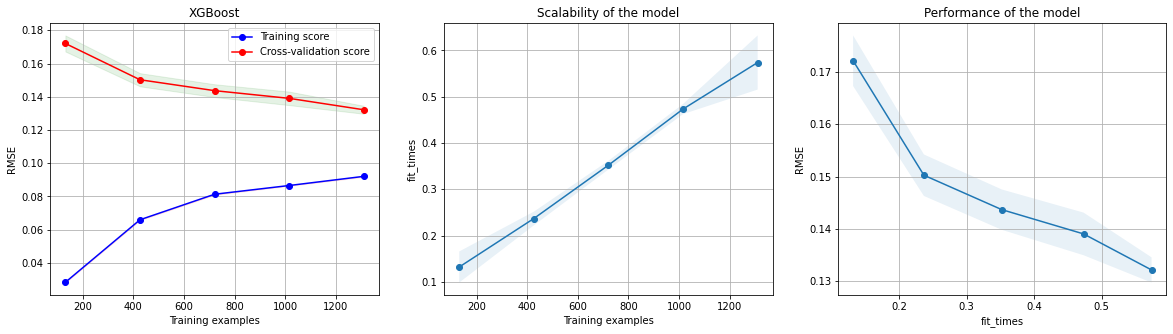

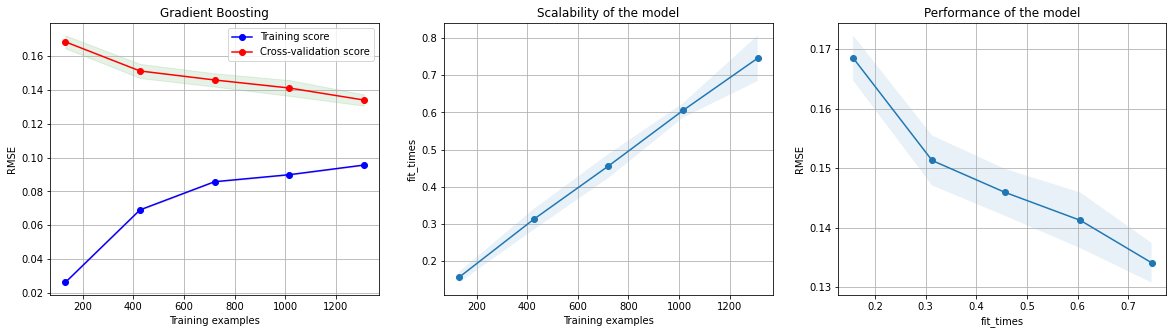

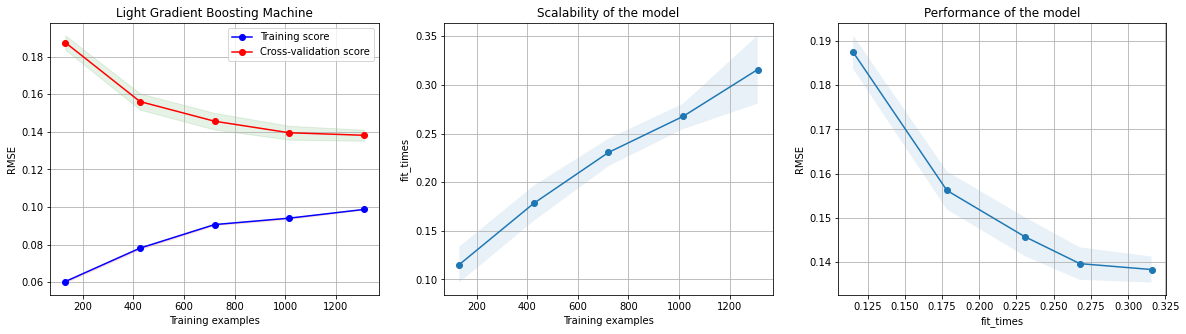

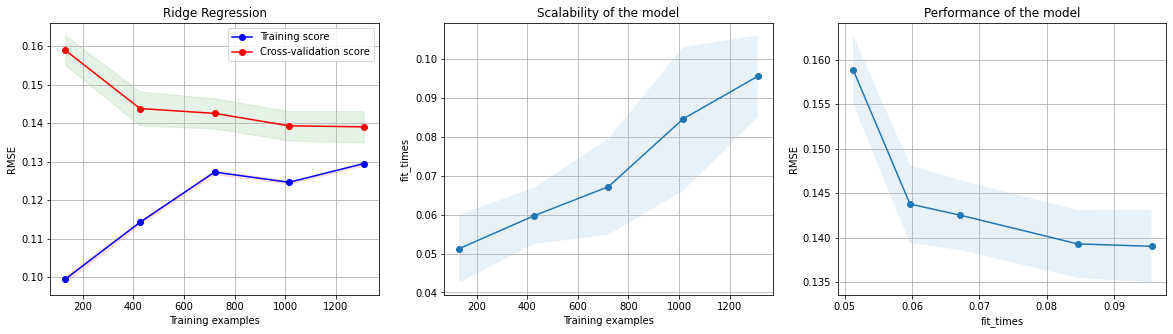

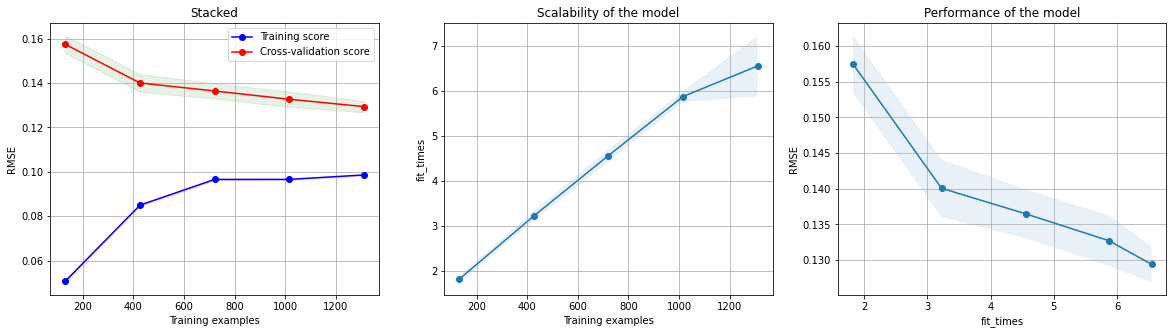

In [112]:
plot_learning_curve(pipeline_xgb, "XGBoost",X,y_log, cv = cross_val, n_jobs = -1)
plot_learning_curve(pipeline_gb, "Gradient Boosting", X, y_log, cv = cross_val , n_jobs = -1)
plot_learning_curve(pipeline_lgbm, "Light Gradient Boosting Machine", X, y_log, cv = cross_val, n_jobs = -1)
plot_learning_curve(pipeline_ridge, "Ridge Regression", X, y_log, cv = cross_val, n_jobs = -1)
plot_learning_curve(pipeline_stack, "Stacked",X,y_log, cv = cross_val, n_jobs = -1)
plt.show()

# 8- Best Model & Feature Selection

## Feature Importance

In [113]:
# Getting the names of columns after applying the transformations 

# Step 1: nominal data
df_categorical = df_nominal.copy()
X_cat1 = df_categorical.copy()
X_cat1 = cat_pipeline.fit_transform(X_cat1)
cat_cols_ohe = list(column_transformer.transformers[0][1].named_steps['ohe'].get_feature_names(nominal_features))

# Step 2: ordinal data
cat_cols_ordinalenc = list(ordinal_features) 

# Step 3: numerical data
num_vars_list = list(df_numerical)

# Column names
col_names = num_vars_list + cat_cols_ordinalenc + cat_cols_ohe
#col_names

In [114]:
# Feature selection with RFECV
cross_val = KFold(n_splits = 5, shuffle = True, random_state = 1)

X_rfe = column_transformer.fit_transform(X)
xgb = XGBRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 100)

rfecv = RFECV(estimator = xgb, step = 10, cv = cross_val, scoring = 'r2', n_jobs = -1)
rfecv.fit(X_rfe, y)

print(f"Average r2 score Using RFECV: {rfecv.score(X_rfe,y):.3f}")

[00:00:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:00:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average r2 score Using RFECV: 0.956


In [115]:
rfecv_importance = rfecv.estimator_.feature_importances_
rfecv_feature_imp = pd.DataFrame(sorted(zip(rfecv_importance, col_names)), columns=['Importance', 'Feature'])


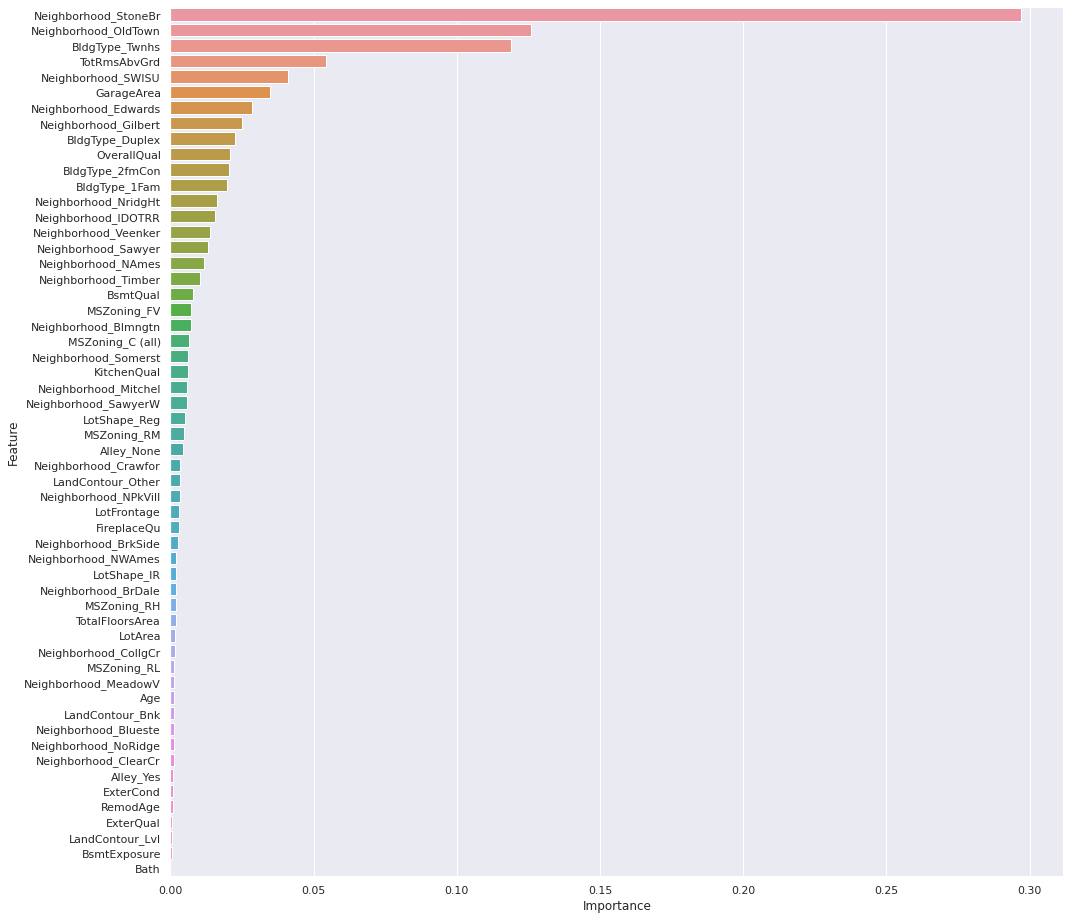

In [116]:
features= rfecv_feature_imp.copy()

sns.set(rc = {'figure.figsize':(16,16)})
#features = features[features['Ranking'] == 1]
features = features.sort_values('Importance', ascending=False)
sns.barplot(x=features['Importance'], y=features['Feature'])

## XGB With Feature Selection

In [117]:
#The only features that have importance are kept, 12 features were removed 

# Subsetting categorical features: ordinal
df1 = df.copy()
ordinal_features1 = ['BsmtQual', 'KitchenQual', 'FireplaceQu', 'ExterCond', 'ExterQual', 'BsmtExposure']
df1_ordinal = df1[ordinal_features1]

# Subsetting categorical features: nominal
nominal_features1 = ['Neighborhood', 'BldgType', 'MSZoning', 'Alley', 'LotShape', 'LandContour']
df1_nominal = df1[nominal_features1]

# Subsetting numerical features
numerical_features1 = ['Bath', 'TotRmsAbvGrd', 'GarageArea', 'OverallQual', 'LotFrontage', 'LotArea', 'Age', 'RemodAge', 'TotalFloorsArea']
df1_numerical = df1[numerical_features1]

# Features
X1 = pd.concat([df1_numerical, df1_ordinal, df1_nominal], axis = 1)

# Taregt Variable
y1 = df1['SalePrice']

y1_log=np.log(y1)


In [118]:
# Categorical pipeline
cat_pipeline1= Pipeline(steps=[
    ('impute', SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'None')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

ordinal_pipeline1= Pipeline(steps=[
    ('ord1', OrdinalEncoder(categories = [['Bad','Average','Good']], handle_unknown='use_encoded_value',
                           unknown_value=-1))
])

# Numerical pipeline     
num_pipeline1 = Pipeline(steps=[
   
    ('impute', KNNImputer(missing_values = np.nan)),
    ('log', FunctionTransformer(np.log1p)),
      ('outlier',RobustScaler())
])

# Pipeline
column_transformer1= ColumnTransformer(transformers=[
    ('ohe', cat_pipeline1, nominal_features1),                                                   
    ('ord1', ordinal_pipeline1, ['ExterQual']),
    ('ord2', ordinal_pipeline1, ['ExterCond']),
    ('ord3', ordinal_pipeline1, ['BsmtQual']),
    ('ord4', ordinal_pipeline1, ['KitchenQual']),
    ('ord5', ordinal_pipeline1, ['FireplaceQu']),
    ('ord6', ordinal_pipeline1, ['BsmtExposure']), 
    ('impute', num_pipeline1, numerical_features1)
], remainder='drop')

In [119]:
# Instantiate the model
xgb_model1 = XGBRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 100)

pipeline_xgb1 = Pipeline(steps=[
    ('transformer', column_transformer1),
    ('model', xgb_model1)
])

cross_val = KFold(n_splits=10, shuffle=True, random_state=123)

# Evaluate the Model
scores = cross_validate(pipeline_xgb1, X1, y1_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1 ,
                       return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('RMSE-Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('RMSE-Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.943, Standard Deviation: (0.001)
R2-Test : Cross Validation R2 0.887, Standard Deviation: (0.012)
RMSE-Train : Cross Validation RMSE: 0.095 
RMSE-Test : Cross Validation RMSE: 0.133 


## Stacking with Feature Selection

In [120]:
xgb_model1 = XGBRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 100)
gb_model1 = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 100)
lgbm_model1 = LGBMRegressor(learning_rate = 0.1, max_depth = 2, n_estimators = 500)
ridge_model1 = Ridge(alpha = 4)

stack1 = StackingRegressor(estimators = [('xgb',xgb_model1),
                                        ('gb',gb_model1),
                                        ('lgbm',lgbm_model1),
                                        ('ridge',ridge_model1)
                                        ],
                          final_estimator= RidgeCV(alphas=(0.03), normalize=True),
                          n_jobs = -1)

pipeline_stack1 = Pipeline(steps = [('transformer', column_transformer1), 
                             ('model', stack1)])

# Evaluate the Model
scores = cross_validate(pipeline_stack1, X1, y1_log, scoring= ['r2','neg_mean_squared_error'], cv = cross_val, n_jobs=-1, 
                        return_train_score = True)

# Reporting the Results
print('R2-Train : Cross Validation R2: %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['train_r2']), np.std(scores['train_r2'])))
print('R2-Test : Cross Validation R2 %.3f, Standard Deviation: (%.3f)' % (np.mean(scores['test_r2']), np.std(scores['test_r2'])))
print('Train : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['train_neg_mean_squared_error'])))
print('Test : Cross Validation RMSE: %.3f '% np.sqrt(np.mean(-scores['test_neg_mean_squared_error'])))

R2-Train : Cross Validation R2: 0.934, Standard Deviation: (0.002)
R2-Test : Cross Validation R2 0.891, Standard Deviation: (0.014)
Train : Cross Validation RMSE: 0.102 
Test : Cross Validation RMSE: 0.131 


#### Learning Curve

In [121]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("RMSE")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        scoring = 'neg_mean_squared_error',
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.sqrt(-np.mean(test_scores, axis=1))
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="b", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="r", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("RMSE")
    axes[2].set_title("Performance of the model")

    return plt

In [122]:
pipeline_stack1 = Pipeline(steps = [
                                 ('preprocess', column_transformer1),
                                 ('model', stack1)
])

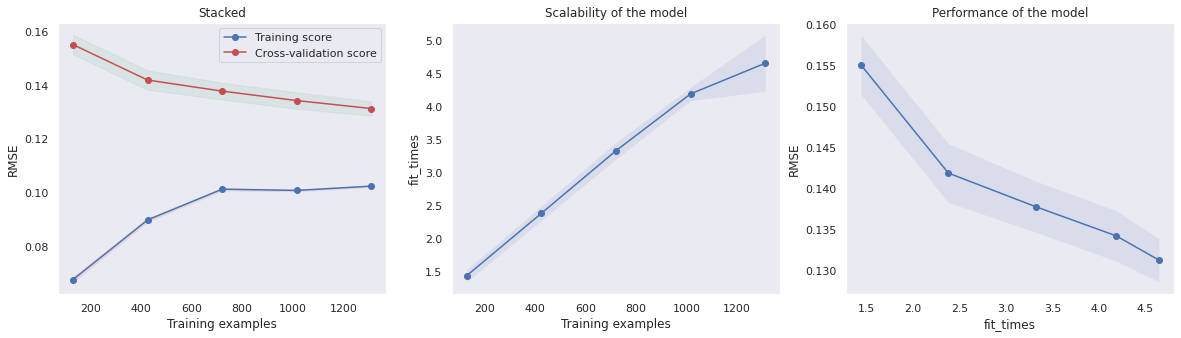

In [123]:
plot_learning_curve(pipeline_stack1, "Stacked", X1, y1_log, cv = cross_val, n_jobs = -1)
plt.show()